# ★원점을 지나는 회귀방정식★   
#### 일반적으로 회귀모델에서는 '상수항'을 포함해야한다.
#### 그러나 사망자수, 중상자수, 경상자수, 부상신고자수 로 구성된 EPDO 값 특성상  사고가 발생하지 않으면 EPDO의 값은 0이 도출된다.
#### 따라서 독립변수들의 계수가 0이면 (사고가 발생하지 않으면) 종속변수의 값도 0이 되어야 하므로 원점을 지나는 회귀모델을 사용하겠다.

In [105]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from statsmodels.api import OLS
import statsmodels.api as sm

In [106]:
df=pd.read_csv('C:/Users/user/TEST3/csv파일/데이터셋_4(심각도).csv',encoding='cp949')

In [107]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27284 entries, 0 to 27283
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   사고유형        27284 non-null  object
 1   연령가해자       27284 non-null  object
 2   법규위반가해자     27284 non-null  object
 3   행동유형가해자     27284 non-null  object
 4   피해자신체상해주부위  27284 non-null  object
 5   차량용도가해자     27284 non-null  object
 6   도로종류        27284 non-null  object
 7   도로형태        27284 non-null  object
 8   도로선형        27284 non-null  object
 9   발생시각        27284 non-null  object
 10  심각도         27284 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 2.3+ MB


# 전체 변수들과의 ols 회귀분석 진행
### 설명변수(X)와 타겟변수(Y)를 분리/학습데이터와 평가데이터를 분할
##### Split Data Set Shape 출력물

In [108]:
y=df['심각도']

In [114]:
feature_columns = df.columns.difference(["심각도"]) # Target column 빼기

X=df.drop(['심각도'],axis=1)
X=pd.get_dummies(X,drop_first=True)
y=pd.DataFrame(df['심각도'])

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(19098, 35) (8186, 35) (19098, 1) (8186, 1)


# 1.1) train & OLS 회귀모델 적합

In [115]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.751
Model:                            OLS   Adj. R-squared (uncentered):              0.751
Method:                 Least Squares   F-statistic:                              1644.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        09:53:10   Log-Likelihood:                         -10815.
No. Observations:               19098   AIC:                                  2.170e+04
Df Residuals:                   19063   BIC:                                  2.197e+04
Df Model:                          35                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.0843      0.019      4.362      0.000       0.046       0.122
사고유형_차도통행중         0.0553      0.013      4.249      0.000       0.030       0.081
사고유형_횡단중           0.1067      0.011      9.489      0.000       0.085       0.129
연령가해자_21-30세       0.0063      0.024      0.260      0.795      -0.041       0.054
연령가해자_31-40세       0.0189      0.024      0.793      0.428      -0.028       0.066
연령가해자_41-50세       0.0105      0.024      0.446      0.656      -0.036       0.057
연령가해자_51-60세       0.0056      0.023      0.239      0.811      -0.040       0.052
연령가해자_61-64세       0.0197      0.025      0.789      0.430      -0.029       0.069
연령가해자_65세이상       -0.0002      0.024     -0.010      0.992      -0.047       0.047
법규위반가해자_그룹2        0.0133      0.007      1.806      0.071      -0.001       0.028
법규위반가해자_그룹3        0.1603      0.034      4.770      0.000       0.094       0.226
행동유형가해자_그룹2        0.0769      0.014      5.389      0.000       0.049       0.105
행동유형가해자_그룹3        0.0366      0.015      2.430      0.015       0.007       0.066
행동유형가해자_그룹4       -0.0607      0.055     -1.099      0.272      -0.169       0.047
피해자신체상해주부위_그룹2     0.2298      0.064      3.603      0.000       0.105       0.355
피해자신체상해주부위_그룹3     0.3591      0.063      5.675      0.000       0.235       0.483
피해자신체상해주부위_그룹4     0.4480      0.063      7.085      0.000       0.324       0.572
피해자신체상해주부위_그룹5     0.5077      0.063      8.034      0.000       0.384       0.632
피해자신체상해주부위_그룹6     0.5827      0.064      9.120      0.000       0.457       0.708
차량용도가해자_그룹2       -0.0129      0.018     -0.721      0.471      -0.048       0.022
차량용도가해자_그룹3       -0.0717      0.015     -4.833      0.000      -0.101      -0.043
차량용도가해자_그룹4       -0.0365      0.007     -5.011      0.000      -0.051      -0.022
차량용도가해자_그룹5       -0.2036      0.027     -7.488      0.000      -0.257      -0.150
도로종류_군도            0.1942      0.068      2.872      0.004       0.062       0.327
도로종류_시도            0.1643      0.067      2.458      0.014       0.033       0.295
도로종류_일반국도          0.2228      0.068      3.286      0.001       0.090       0.356
도로종류_지방도           0.1960      0.068      2.904      0.004       0.064       0.328
도로종류_특별광역시도        0.1420      0.067      2.127      0.033       0.011       0.273
도로형태_단일로          -0.0036      0.007     -0.501      0.617      -0.018       0.010
도로형태_주차장          -0.0518      0.069     -0.753      0.451      -0.187       0.083
도로선형_오르막          -0.0104      0.018     -0.582      0.561      -0.045       0.025
도로선형_평지           -0.0358      0.013     -2.755      0.006      -0.061      -0.010
발생시각_새벽~아침         0.1026      0.010     10.347      0.000       0.083       0.

# 1.2) 다중공선성 검사

## 출력된 VIF Factor 값이 10크면 다중공선성이 있다는 것이다.

In [116]:
corolla = pd.concat([train_x,train_y],axis=1)

In [117]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,1.467422,사고유형_보도통행중
1,2.604505,사고유형_차도통행중
2,9.651322,사고유형_횡단중
3,5.822906,연령가해자_21-30세
4,9.443244,연령가해자_31-40세
5,12.902255,연령가해자_41-50세
6,15.496450,연령가해자_51-60세
7,5.782160,연령가해자_61-64세
8,8.767656,연령가해자_65세이상
9,1.735754,법규위반가해자_그룹2


# 1.3) 1차적으로 vif가 100넘는 것만 일단 삭제 

In [118]:
X= X.drop(['피해자신체상해주부위_그룹4','피해자신체상해주부위_그룹5','도로종류_시도','도로종류_특별광역시도'],axis=1)

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(19098, 31) (8186, 31) (19098, 1) (8186, 1)


# 1.4) 다시 OLS

In [120]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.742
Model:                            OLS   Adj. R-squared (uncentered):              0.742
Method:                 Least Squares   F-statistic:                              1774.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        09:54:32   Log-Likelihood:                         -11125.
No. Observations:               19098   AIC:                                  2.231e+04
Df Residuals:                   19067   BIC:                                  2.256e+04
Df Model:                          31                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.1373      0.020      7.036      0.000       0.099       0.175
사고유형_차도통행중         0.1208      0.013      9.434      0.000       0.096       0.146
사고유형_횡단중           0.1580      0.011     14.500      0.000       0.137       0.179
연령가해자_21-30세       0.3301      0.019     17.735      0.000       0.294       0.367
연령가해자_31-40세       0.3487      0.018     19.824      0.000       0.314       0.383
연령가해자_41-50세       0.3529      0.017     20.786      0.000       0.320       0.386
연령가해자_51-60세       0.3416      0.017     20.295      0.000       0.309       0.375
연령가해자_61-64세       0.3544      0.019     18.782      0.000       0.317       0.391
연령가해자_65세이상        0.3334      0.018     18.897      0.000       0.299       0.368
법규위반가해자_그룹2        0.0187      0.007      2.498      0.012       0.004       0.033
법규위반가해자_그룹3        0.1848      0.034      5.401      0.000       0.118       0.252
행동유형가해자_그룹2        0.1875      0.013     13.904      0.000       0.161       0.214
행동유형가해자_그룹3        0.1601      0.014     11.310      0.000       0.132       0.188
행동유형가해자_그룹4        0.0393      0.052      0.752      0.452      -0.063       0.142
피해자신체상해주부위_그룹2    -0.2267      0.011    -20.598      0.000      -0.248      -0.205
피해자신체상해주부위_그룹3    -0.1051      0.008    -13.650      0.000      -0.120      -0.090
피해자신체상해주부위_그룹6     0.1168      0.012      9.838      0.000       0.094       0.140
차량용도가해자_그룹2        0.0054      0.018      0.300      0.765      -0.030       0.040
차량용도가해자_그룹3       -0.0040      0.014     -0.275      0.783      -0.032       0.024
차량용도가해자_그룹4       -0.0139      0.007     -1.913      0.056      -0.028       0.000
차량용도가해자_그룹5       -0.0702      0.027     -2.634      0.008      -0.122      -0.018
도로종류_군도            0.0610      0.013      4.619      0.000       0.035       0.087
도로종류_일반국도          0.0860      0.014      6.129      0.000       0.058       0.113
도로종류_지방도           0.0511      0.012      4.311      0.000       0.028       0.074
도로형태_단일로           0.0268      0.007      3.789      0.000       0.013       0.041
도로형태_주차장          -0.0012      0.067     -0.018      0.985      -0.133       0.131
도로선형_오르막           0.0665      0.018      3.798      0.000       0.032       0.101
도로선형_평지            0.0515      0.012      4.187      0.000       0.027       0.076
발생시각_새벽~아침         0.1227      0.010     12.237      0.000       0.103       0.142
발생시각_저녁~자정         0.0473      0.011      4.415      0.000       0.026       0.068
발생시각_출퇴근시간         0.0547      0.007      7.500      0.000       0.040       0.069
==============================================================================
Omnibus:                     3002.082   Durbin-Watson:                   1.992
Prob

# 1.5) P > 0.05 인 것(유의하지 않은 것) 삭제

In [121]:
X = X.drop(['행동유형가해자_그룹4','차량용도가해자_그룹2','차량용도가해자_그룹3','차량용도가해자_그룹4','도로형태_주차장'],axis=1)

train_x, test_x, train_y, test_y = train_test_split(X,y, train_size = 0.7, test_size = 0.3)

print(train_x.shape, test_x.shape, train_y.shape, test_y.shape)

(19098, 26) (8186, 26) (19098, 1) (8186, 1)


# 1.6) 다중공선성 재검사
#### ▶ 행동유형가해자_그룹2 을 삭제하면 행동유형가해자 컬럼에 대한 범주가 '그룹3' 하나만 남기때문에 삭제 안 함
#### ▶ 도로선형_평지 를 삭제하면 도로선형 컬럼에대한 범주가 '오르막' 하나만 남기때문에 삭제 안 함

In [122]:
corolla = pd.concat([train_x,train_y],axis=1)

vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(corolla.values, i) for i in range(corolla.shape[1])]
vif["features"] = corolla.columns
vif

,VIF Factor,features
0,1.406412,사고유형_보도통행중
1,2.391717,사고유형_차도통행중
2,8.742010,사고유형_횡단중
3,3.239155,연령가해자_21-30세
4,4.707431,연령가해자_31-40세
5,6.116821,연령가해자_41-50세
6,7.294915,연령가해자_51-60세
7,3.039984,연령가해자_61-64세
8,4.467112,연령가해자_65세이상
9,1.716674,법규위반가해자_그룹2


# 1.7) OLS 결과

In [123]:
full_model = sm.OLS(train_y,train_x)
fitted_full_model = full_model.fit()

fitted_full_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.741
Model:                            OLS   Adj. R-squared (uncentered):              0.740
Method:                 Least Squares   F-statistic:                              2096.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        09:55:31   Log-Likelihood:                         -11185.
No. Observations:               19098   AIC:                                  2.242e+04
Df Residuals:                   19072   BIC:                                  2.263e+04
Df Model:                          26                                                  
Covariance Type:            nonrobust                                                  
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
사고유형_보도통행중         0.1363      0.019      7.033      0.000       0.098       0.174
사고유형_차도통행중         0.1239      0.013      9.717      0.000       0.099       0.149
사고유형_횡단중           0.1672      0.011     15.376      0.000       0.146       0.188
연령가해자_21-30세       0.3419      0.018     18.905      0.000       0.306       0.377
연령가해자_31-40세       0.3496      0.017     20.628      0.000       0.316       0.383
연령가해자_41-50세       0.3586      0.016     21.904      0.000       0.327       0.391
연령가해자_51-60세       0.3517      0.016     21.668      0.000       0.320       0.384
연령가해자_61-64세       0.3604      0.018     19.501      0.000       0.324       0.397
연령가해자_65세이상        0.3472      0.017     20.254      0.000       0.314       0.381
법규위반가해자_그룹2        0.0115      0.007      1.530      0.126      -0.003       0.026
법규위반가해자_그룹3        0.1724      0.035      4.973      0.000       0.104       0.240
행동유형가해자_그룹2        0.1821      0.013     14.114      0.000       0.157       0.207
행동유형가해자_그룹3        0.1482      0.014     10.793      0.000       0.121       0.175
피해자신체상해주부위_그룹2    -0.2128      0.011    -19.234      0.000      -0.235      -0.191
피해자신체상해주부위_그룹3    -0.0991      0.008    -12.928      0.000      -0.114      -0.084
피해자신체상해주부위_그룹6     0.1211      0.012     10.115      0.000       0.098       0.145
차량용도가해자_그룹5       -0.0474      0.026     -1.809      0.070      -0.099       0.004
도로종류_군도            0.0579      0.013      4.388      0.000       0.032       0.084
도로종류_일반국도          0.0772      0.014      5.539      0.000       0.050       0.105
도로종류_지방도           0.0473      0.012      3.988      0.000       0.024       0.071
도로형태_단일로           0.0149      0.007      2.095      0.036       0.001       0.029
도로선형_오르막           0.0504      0.017      2.883      0.004       0.016       0.085
도로선형_평지            0.0437      0.012      3.612      0.000       0.020       0.067
발생시각_새벽~아침         0.1194      0.010     11.783      0.000       0.100       0.139
발생시각_저녁~자정         0.0522      0.011      4.859      0.000       0.031       0.073
발생시각_출퇴근시간         0.0513      0.007      7.043      0.000       0.037       0.066
==============================================================================
Omnibus:                     3100.085   Durbin-Watson:                   2.006
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2878.323
Skew:                          -0.875   Prob(JB):                         0.00
Kurtosis:                       2.253   Cond. No.                         21.4
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.


### ▶ y 예측값
####  → 소수 첫째자리에서 반올림해서 나타내겠음 

In [124]:
pred_y = fitted_full_model.predict(test_x)
pred_y = pd.DataFrame(pred_y)
pred_y.rename(columns ={0:'y예측'},inplace=True)

for i in range(len(pred_y)):
     pred_y.iloc[i] = int(pred_y.iloc[i])
     pred_y.iloc[i] =  round(pred_y.iloc[i],0)

In [125]:
pred_y

,y예측
8789,0.0
9175,0.0
6272,0.0
849,0.0
1145,0.0
...,...
17016,0.0
4623,0.0
3032,0.0
19127,0.0


In [126]:
cnt = pred_y['y예측'].value_counts()
cnt = pd.DataFrame(cnt)
cnt.transpose()

,0.0,1.0
y예측,8103,83


(array([0, 1]), [Text(0, 0, '0.0'), Text(1, 0, '1.0')])

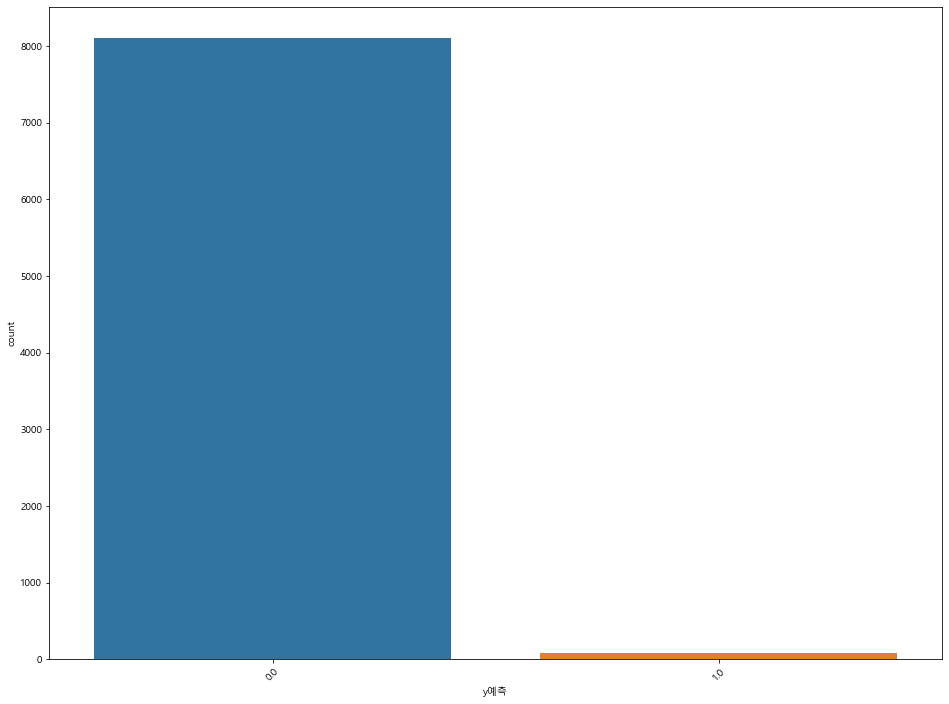

In [127]:
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

fig, (ax1) = plt.subplots(1,1, figsize=(16,12))
sns.countplot(data=pred_y, x="y예측", ax=ax1)
plt.xticks(rotation=45)

---

---

---

# ■ ols 모델에서 중요 변수를 선택하는 과정을 수행해보자

# 0.변수선택법

In [128]:
feature_columns = train_x.columns.difference(["심각도"])

In [137]:
#변수 선택법
def processSubset(x,y, feature_set):
    model = sm.OLS(y,x[list(feature_set)])  #modeling
    regr = model.fit()  #모델학습
    AIC = regr.aic    #모델의 AIC
    return {"model" : regr , "AIC" : AIC}
 
print(processSubset(x=train_x,y=train_y,feature_set=feature_columns))

{'model': <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EAAE6ED160>, 'AIC': 22422.497294766905}


In [138]:
#모든 조합을 다 조합해서 좋은 모델을 반환시키는 알고리즘
import time
import itertools
 
def getBest(x,y,k):
    tic = time.time()  #시작시간
    results = []       #결과저장공간
    for combo in itertools.combinations(x.columns.difference(['사고유형_보도통행중']),k): 
        combo=(list(combo)+['사고유형_보도통행중'])
        #각 변수조합을 고려한 경우의 수
        results.append(processSubset(x,y,feature_set=combo))#모델링된 것들을 저장
    models=pd.DataFrame(results) #데이터 프레임으로 변환
    #가장 낮은 AIC를 가지는 모델 선택 및 저장
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time() #종료시간
    print("Processed",models.shape[0],"models on",k,"predictors in",(toc-tic),
          "seconds.")
    return  bestModel

In [139]:
print(getBest(x=train_x,y=train_y,k=3))

Processed 2300 models on 3 predictors in 22.845059156417847 seconds.
model    <statsmodels.regression.linear_model.Regressio...
AIC                                                24722.7
Name: 2079, dtype: object


In [140]:
#변수 선택에 따른 학습시간과 저장 K 반복
 
models = pd.DataFrame(columns=["AIC","model"])
tic = time.time()
for i in range(1,5):
    models.loc[i] = getBest(train_x,train_y,i)
 
toc = time.time()
print("Total elapsed time : ",(toc-tic),"seconds")
 
print(models)

Processed 25 models on 1 predictors in 0.14966177940368652 seconds.
Processed 300 models on 2 predictors in 2.3912253379821777 seconds.
Processed 2300 models on 3 predictors in 24.466126680374146 seconds.
Processed 12650 models on 4 predictors in 197.1308970451355 seconds.
Total elapsed time :  238.39526796340942 seconds
            AIC                                              model
1  29033.989644  <statsmodels.regression.linear_model.Regressio...
2  25268.403117  <statsmodels.regression.linear_model.Regressio...
3  24722.748968  <statsmodels.regression.linear_model.Regressio...
4  24176.427607  <statsmodels.regression.linear_model.Regressio...


In [142]:
models.loc[4,"model"].summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                    심각도   R-squared (uncentered):                   0.715
Model:                            OLS   Adj. R-squared (uncentered):              0.715
Method:                 Least Squares   F-statistic:                              9589.
Date:                Tue, 08 Dec 2020   Prob (F-statistic):                        0.00
Time:                        10:15:40   Log-Likelihood:                         -12083.
No. Observations:               19098   AIC:                                  2.418e+04
Df Residuals:                   19093   BIC:                                  2.422e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
사고유형_차도통행중      0.2872      0.012     23.582      0.000       0.263       0.311
사고유형_횡단중        0.3297      0.010     33.483      0.000       0.310       0.349
행동유형가해자_그룹2     0.4589      0.010     47.721      0.000       0.440       0.478
행동유형가해자_그룹3     0.4075      0.011     38.281      0.000       0.387       0.428
사고유형_보도통행중      0.2990      0.019     15.699      0.000       0.262       0.336
==============================================================================
Omnibus:                     2360.805   Durbin-Watson:                   2.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2501.134
Skew:                          -0.832   Prob(JB):                         0.00
Kurtosis:                       2.386   Cond. No.                         7.38
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

# 1.전진선택법

In [143]:
#전진 선택법(Step=1)
 
def forward(x,y,predictors):
    remainingPredictors = [p for p in x.columns.difference(['사고유형_보도통행중'])
                           if p not in predictors]
    tic=time.time()
    results=[]
    for p in remainingPredictors:
        results.append(processSubset(x=x,y=y,feature_set=predictors+[p]+['사고유형_보도통행중']))
    #데이터프레임으로 변환
    models = pd.DataFrame(results)
 
    #AIC가 가장 낮은 것을 선택
    bestModel = models.loc[models['AIC'].argmin()] #index
    toc = time.time()
    print("Processed ", models.shape[0],"models on", len(predictors)+1,
          "predictors in",(toc-tic))
    print("Selected predictors:",bestModel['model'].model.exog_names,
          'AIC : ',bestModel[0])
    return bestModel
 
#전진선택법 모델
def forward_model(x,y):
    fModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = []
    #변수1~10개 : 0~9 -> 1~10
    for i in range(1,len(x.columns.difference(['사고유형_보도통행중']))+1):
        forwardResult= forward(x,y,predictors)
        if i > 1:
            if forwardResult['AIC'] > fmodelBefore:
                break
        fModels.loc[i] = forwardResult
        predictors = fModels.loc[i]["model"].model.exog_names
        fmodelBefore = fModels.loc[i]["AIC"]
        predictors = [k for k in predictors if k != '사고유형_보도통행중']
    toc = time.time()
    print("Total elapesed time : ", (toc - tic), "seconds.")
 
    return (fModels['model'][len(fModels['model'])])
 
forwordBestModel=forward_model(train_x,train_y)
 
print(forwordBestModel.summary())

Processed  25 models on 1 predictors in 0.17095446586608887
Selected predictors: ['도로선형_평지', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EAADF2BFD0>
Processed  24 models on 2 predictors in 0.19953083992004395
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EAADF254F0>
Processed  23 models on 3 predictors in 0.23011231422424316
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EAADF25B80>
Processed  22 models on 4 predictors in 0.22960972785949707
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_차도통행중', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EAADF2BAF0>
Processed  21 models on 5 predictors in 0.2667872905731201
Selected predictors: ['도로선형_평지', '도로선형_오르막'

# 2.후진제거법

In [144]:
#후진제거법
 
def backward(x,y,predictors):
    tic = time.time()
    results=[]
    #데이터 변수들이 미리정의된 predictors 조합확인
    for combo in itertools.combinations(predictors, len(predictors)-1):
        results.append(processSubset(x,y,list(combo)+['사고유형_보도통행중']))
    models = pd.DataFrame(results)
    #가장 낮은 AIC를 가진 모델을 선택
    bestModel = models.loc[models['AIC'].argmin()]
    toc = time.time()
    print("Processed",models.shape[0],"models on",len(predictors)-1,
          "predictors in",(toc - tic))
    print("Selected predictors :",bestModel['model'].model.exog_names,
          ' AIC:',bestModel[0])
    return bestModel
 
def backword_model(x,y):
    BModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    #미리 정의된 데이터 변수
    predictors = x.columns.difference(['사고유형_보도통행중'])
    BmodelBefore = processSubset(x,y,predictors)['AIC']
    while(len(predictors)>1):
        backwardResult=backward(train_x,train_y,predictors)
        if backwardResult['AIC'] > BmodelBefore:
            break
        BModels.loc[len(predictors)-1] = backwardResult
        predictors = BModels.loc[len(predictors)-1]["model"].model.exog_names
        BmodelBefore = backwardResult["AIC"]
        predictors = [ k for k in predictors if k != '사고유형_보도통행중']
 
    toc = time.time()
    print("Total elapsed time :",(toc - tic), "seconds.")
    return (BModels["model"].dropna().iloc[0])
 
backwardBestModel = backword_model(train_x,train_y)
print(backwardBestModel.summary())

Processed 25 models on 24 predictors in 0.9840579032897949
Selected predictors : ['도로선형_오르막', '도로선형_평지', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '도로형태_단일로', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹3', '사고유형_차도통행중', '사고유형_횡단중', '연령가해자_21-30세', '연령가해자_31-40세', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_61-64세', '연령가해자_65세이상', '차량용도가해자_그룹5', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EAADF21100>
Processed 24 models on 23 predictors in 0.9150457382202148
Selected predictors : ['도로선형_오르막', '도로선형_평지', '도로종류_군도', '도로종류_일반국도', '도로종류_지방도', '도로형태_단일로', '발생시각_새벽~아침', '발생시각_저녁~자정', '발생시각_출퇴근시간', '법규위반가해자_그룹3', '사고유형_차도통행중', '사고유형_횡단중', '연령가해자_21-30세', '연령가해자_31-40세', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_61-64세', '연령가해자_65세이상', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹3', '피해자신체상해주부위_그룹6', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '사고유형_보도통행중']  AIC: <statsmodels.regression

# 3.단계적선택법

In [145]:
def Stepwise_model(x,y):
    stepModels = pd.DataFrame(columns=["AIC","model"])
    tic = time.time()
    predictors = []
    SmodelBefore = processSubset(x,y,predictors+['사고유형_보도통행중'])['AIC']
    #변수 1~10개 : 0~9 -> 1~10
    for i in range(1, len(x.columns.difference(['사고유형_보도통행중']))+1):
        forwardResult = forward(x,y,predictors)
        print("forward")
        stepModels.loc[i] = forwardResult
        predictors = stepModels.loc[i]["model"].model.exog_names
        predictors = [k for k in predictors if k != '사고유형_보도통행중']
        backwordResult = backward(x,y,predictors)
        if backwordResult['AIC'] < forwardResult['AIC']:
            stepModels.loc[i] = backwordResult
            predictors=stepModels.loc[i]["model"].model.exog_names
            smodelBefore=stepModels.loc[i]["AIC"]
            predictors=[k for k in predictors if k != '사고유형_보도통행중']
            print('backward')
        if stepModels.loc[i]["AIC"] > SmodelBefore:
            break
        else:
            smodelBefore = stepModels.loc[i]["AIC"]
    toc=time.time()
    print("Total elapsed time : ", (toc - tic), "seconds")
    return (stepModels['model'][len(stepModels['model'])])
 
stepwiseBestModel = Stepwise_model(train_x,train_y)
print(stepwiseBestModel.summary())

Processed  25 models on 1 predictors in 0.1664423942565918
Selected predictors: ['도로선형_평지', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EC87893DF0>
forward
Processed 1 models on 0 predictors in 0.004511594772338867
Selected predictors : ['사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB68D30>
Processed  24 models on 2 predictors in 0.23462343215942383
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB68700>
forward
Processed 2 models on 1 predictors in 0.019051074981689453
Selected predictors : ['도로선형_평지', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EC8789F3D0>
Processed  23 models on 3 predictors in 0.20955610275268555
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_보도통행중'] AIC :  <statsmodels.regression.

Processed  11 models on 15 predictors in 0.2658724784851074
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹6', '발생시각_새벽~아침', '피해자신체상해주부위_그룹3', '발생시각_출퇴근시간', '도로형태_단일로', '차량용도가해자_그룹5', '도로종류_일반국도', '도로종류_군도', '사고유형_보도통행중'] AIC :  <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EC87893550>
forward
Processed 15 models on 14 predictors in 0.3280296325683594
Selected predictors : ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹6', '발생시각_새벽~아침', '피해자신체상해주부위_그룹3', '발생시각_출퇴근시간', '도로형태_단일로', '차량용도가해자_그룹5', '도로종류_일반국도', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000EC8789FA00>
Processed  10 models on 16 predictors in 0.2669963836669922
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그룹2', '피해자신체상해주부위

Processed 24 models on 23 predictors in 1.0822575092315674
Selected predictors : ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹6', '발생시각_새벽~아침', '피해자신체상해주부위_그룹3', '발생시각_출퇴근시간', '도로형태_단일로', '도로종류_일반국도', '도로종류_군도', '발생시각_저녁~자정', '법규위반가해자_그룹3', '도로종류_지방도', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_31-40세', '연령가해자_65세이상', '연령가해자_61-64세', '연령가해자_21-30세', '사고유형_보도통행중']  AIC: <statsmodels.regression.linear_model.RegressionResultsWrapper object at 0x000000ED0EB8B130>
Processed  1 models on 25 predictors in 0.06250715255737305
Selected predictors: ['도로선형_평지', '도로선형_오르막', '사고유형_횡단중', '사고유형_차도통행중', '행동유형가해자_그룹2', '행동유형가해자_그룹3', '피해자신체상해주부위_그룹2', '피해자신체상해주부위_그룹6', '발생시각_새벽~아침', '피해자신체상해주부위_그룹3', '발생시각_출퇴근시간', '도로형태_단일로', '차량용도가해자_그룹5', '도로종류_일반국도', '도로종류_군도', '발생시각_저녁~자정', '법규위반가해자_그룹3', '도로종류_지방도', '연령가해자_41-50세', '연령가해자_51-60세', '연령가해자_31-40세', '연령가해자_65세이상', '연령가해자_61-64세', '연령가해자_21-30세', '법규위반가해자_그룹2', '사고유형_보도통행중'] AIC :  <statsm

---

---